# Lab1: Ordinary Differential Equations (Solution)

University of California Berkeley

ME C231A, EE C220B, Experiential Advanced Control I

***

These notes were developed by Roya Firoozi and Francesco Borrelli at UC Berkeley. They are protected by U.S. copyright law and by University policy (https://copyright.universityofcalifornia.edu/resources/ownership-course-materials.html).

If you are enrolled in ME C231A/EE C220B you may take notes and make copies of course materials for your own use. You may also share those materials with another student who is registered and enrolled in this course, and with DSP.

You may not reproduce, distribute or display (post/upload) (Links to an external site.) lecture notes or recordings or course materials in any other way — whether or not a fee is charged — without my express written consent. You also may not allow others to do so. If you do so, you may be subject to student conduct proceedings under the Links to an external site.Berkeley Code of Student Conduct, including Sections 102.23 and 102.25.

***

*This* lab focuses on the solution of ordinary differential equations (ode).
You will learn

1.   functions and anonymous functions in python
2.   the use of the function $\texttt{scipy.integrate.solve_ivp}$ to solve odes. For more information, look at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html .(This function numerically integrates a system of ordinary differential equations.)
3.  the of the python library for symbolic mathematics SymPy to perform analytical differentiation.

***

# Function Representation

In [ ]:
### Function representation example
def out_sum(x):
    return x + 3

# Anonymous Function

In [ ]:
### Anonymous function representation example
out_sum_anonym = lambda x: x + 3
test = lambda t, x: np.exp(x)

In [ ]:
# Both of the above representations are equivalent.
# Evaluate both examples at x = 5 and compare their values:
out_sum(5) == out_sum_anonym(5)

True

***

# Solving Differential Equation
To solve the differential equation dy/dt = f(t,y) for a given initial value y(t0) = y0, we use the following function:

In [ ]:
# scipy.integrate.solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, vectorized=False, args=None)

### Function inputs
# fun: the function which is the right-hand side of the differential equation which can be defined as function or anonymous function
# t_span: the interval of integration (t0,tf), the solver starts at the initial time (t0) and integrates until it reaches the final time (tf)
# y0: the initial value, it has arraylike shape (n,)
# methods: we use RK45, which is explicit Runge-Kutta methods of order 5(4)
# t_eval: the time at which the computed solution is stored
# vectorized: the function is implemented in a vectoried fashion or not, (default is false)
# args: additional arguments to pass to the user-defined function fun

### Function returns
# t: time points
# y: values of the solution at t
# sol: OdeSolution

***

# Exercise 1
Solve the differential equation: $\dot{x}(t) = e^{-x(t)}$, with the initial condition x0 = 1, the initial time t0 = 0 and the final time tf = 20.

[[1.         1.04396127 1.40168981 2.08584257 2.6710987  3.12217415]]


Text(0, 0.5, 'x')

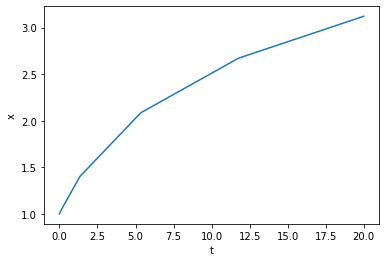

In [ ]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

def exp_ode(t, x):
    return np.exp(-x)

x0 = np.array([1])
t0 = 0
tf = 20

# Either function representation or anonymous function can be set as fun
sol = solve_ivp(fun=exp_ode, t_span=[t0, tf], y0=x0, method='RK45') # function exp_ode is set as fun
print(sol.y)
# sol = solve_ivp(fun= lambda t,x: np.exp(-x), t_span=[t0, tf], y0=x0, method='RK45') # an anonymous function is set as fun

plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('x')

***

# Exercise 2
Solve the differential equation: $\dot{x}(t) = -x(t)e^{t}$, with the initial condition x0 = 1, the initial time t0 = 0 and the final time tf = 5.

Text(0, 0.5, 'x')

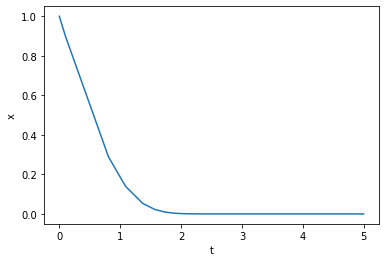

In [ ]:
def x_exp_ode(t, x):
    return (-x)*(np.exp(t))

x0 = np.array([1])
t0 = 0
tf = 5
sol = solve_ivp(fun=x_exp_ode, t_span=[t0, tf], y0=x0, method='RK45')
sol.y[0]
sol.t
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('x')

***

# Exercise 3
Solve the differential equation: $\dot{x}(t) = (-0.2+sin(t))x(t)$, with the initial condition x0 = 1, the initial time t0 = 0 and the final time tf = 5.

Text(0, 0.5, 'x')

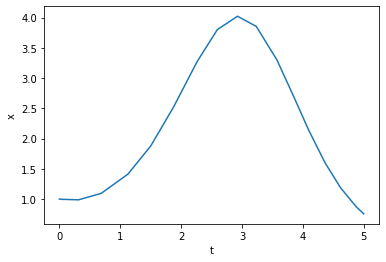

In [ ]:
def sin_ode(t, x):
    return (-0.2+np.sin(t))*x

x0 = np.array([1])
t0 = 0
tf = 5
sol = solve_ivp(fun=sin_ode, t_span=[t0, tf], y0=x0, method='RK45', rtol=1e-6) # rtol is the relative tolerance. The low rtol values result in high precision solutions.
sol.y[0]
sol.t
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('x')

***

# Example
The inverted pendulum system consists of an inverted pendulum mounted on a cart. The dynamics of the inverted pendulum are

\begin{align}
(I + ml^2) \ddot{\theta} + b \dot{\theta} - mgl \sin\theta = ml \cos \theta u.
\end{align}

where $u$ is the cart acceleration, $\theta$ is the pendulum angle and $m$, $l$, and $I$ are the pendulum mass, half-length, and moment of inertia respectively.

In non-linear state-space form the dynamics are
\begin{align}
\begin{bmatrix} \dot{x}_1 \\ \dot{x}_2 \end{bmatrix} =
\begin{bmatrix} x_2 \\ -a_0 \sin x_1 - a_1 x_2 \end{bmatrix} +
\begin{bmatrix}0 \\ b_0 u\cos x_1 \end{bmatrix}
\end{align}

where $x_1 = \theta$ and $x_2 = \dot{\theta}$, and $a_0 = -\tfrac{mgl}{I + ml^2}$, $a_1 = \tfrac{b}{I + ml^2}$, and  $b_0 = \tfrac{ml}{I + ml^2}$.  In this lab we will use the parameters: $a_0 = -2.5$, $a_1 = 0.05$, and $b_0 = 0.25$. The initial condition is [$\pi$/4,0] and the final time tf = 15 seconds. Solve the state-space ode.

In [ ]:
a0 = -2.5
a1 = 0.05
b0 = 0.25
tf = 15

x0 = np.array([np.pi/4, 0])

def dyn_ode(t, x, a0, a1, b0):
    theta, thetadot = x
    return [thetadot, - a0*np.sin(theta) - a1*thetadot + b0*np.cos(theta)]

sol = solve_ivp(fun=dyn_ode, t_span=[t0, tf],
                y0=x0, method='RK45', vectorized=True, args=(a0, a1, b0), rtol=1e-7) # rtol is the relative tolerance. The low rtol values result in high precision solutions.
print(sol.y[1])

[ 0.          0.04581052  0.40132477  0.779734    1.19396226  1.63686077
  2.08126742  2.4872225   2.71207806  2.78390829  2.7164278   2.53166877
  2.25600455  1.90677327  1.49490358  1.02134346  0.50005798  0.03489501
 -0.41160935 -0.87932112 -1.37673364 -1.87036656 -2.309282   -2.54782276
 -2.63103112 -2.57509821 -2.40149081 -2.13501824 -1.78931532 -1.37332536
 -0.89739768 -0.37491643  0.16799314  0.71673583  1.27577525  1.78260298
  2.20465078  2.41804095  2.49038356  2.41769505  2.23238305  1.95376211
  1.59327687  1.15620393  0.64388952  0.06341538 -0.56879411 -1.14101158
 -1.68722582 -2.12090156 -2.30707636 -2.35673615 -2.2698817  -2.07565977
 -1.78946226 -1.41665435 -0.95585372 -0.42164226  0.16515501  0.78081757
  1.37566241  1.84277798  2.09225516  2.2226981   2.21296753  2.08234599
  1.85077485  1.52686904  1.10873323  0.58137787 -0.02893405 -0.68072199
 -1.2426426  -1.72958444 -1.98708459 -2.11229225 -2.08975599 -1.95138699
 -1.71515368 -1.38552164 -0.94943194 -0.36145541  0

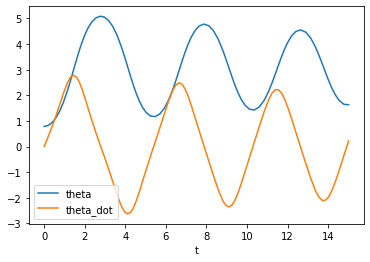

In [ ]:
plt.plot(sol.t, sol.y[0,:])
plt.plot(sol.t, sol.y[1,:])
plt.legend(['theta', 'theta_dot'])
plt.xlabel('t')
plt.show()

***

# Analytical Differentiation
*SymPy* is a python library for symbolic mathematics.

In [ ]:
import sympy as sym
x = sym.Symbol('x')  # declare symbolic variable

A = sym.Matrix(np.eye((4))*x)
print('A = ', A)

A_val = A.subs(x, 3)  # evaluate an expression at a point (evaluate A at x = 3)
print('evaluated_A = ', A_val)

A =  Matrix([[1.0*x, 0, 0, 0], [0, 1.0*x, 0, 0], [0, 0, 1.0*x, 0], [0, 0, 0, 1.0*x]])
evaluated_A =  Matrix([[3.00000000000000, 0, 0, 0], [0, 3.00000000000000, 0, 0], [0, 0, 3.00000000000000, 0], [0, 0, 0, 3.00000000000000]])


In [ ]:
### Jacobian example
x, y, z = sym.symbols('x y z')
sym.Matrix([sym.cos(y) + x, sym.sin(x) + y, z]).jacobian([x, y, z]) # calculate the jacobian matrix (derivative of a vector-valued function)

Matrix([
[     1, -sin(y), 0],
[cos(x),       1, 0],
[     0,       0, 1]])

In [ ]:
### Evaluate jacobian
J = sym.Matrix([sym.cos(y) + x, sym.sin(x) + y, z]).jacobian([x, y, z])
J_val = J.subs([(x, 0), (y, np.pi/4)])   # evaluate jacobian at the point (x = 0, y = pi/4)
print('evaluated_jacobian = ', J_val)

evaluated_jacobian =  Matrix([[1, -0.707106781186547, 0], [1, 1, 0], [0, 0, 1]])
